# Sourmash gather result analysis - weighted_vs_biome plot

> The graph is focusing solely on the average weighted match percentages along with their standard deviations for each biome type. Each biome type is color-coded for clearer visualization.

> The biome3 column contain hierarchical biome information separated by colons (:). The first part ("level 1") appears to describe the general category (e.g., "Host-associated" or "Environmental"), and the second part ("level 2") specifies a more detailed category (e.g., "Mammals", "Human", "Aquatic").

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/join_3k.csv')
len(data)

2867

In [46]:
data.head()

,accession,ref_f_unweighted,ref_f_weighted,n_matches,biome3
0,DRR014782,0.733621,0.949541,12389,Host-associated:Mammals:Respiratory system
1,DRR014785,0.728105,0.946977,13328,Host-associated:Mammals:Respiratory system
2,DRR019499,0.268765,0.259064,21126,Host-associated:Insecta:Digestive system
3,DRR042462,0.901071,0.965085,3213,Host-associated:Human:Digestive system
4,DRR042463,0.815821,0.937989,4229,Host-associated:Human:Digestive system


## plot by Level 3 - total 38

In [47]:
total_biome3_categories = data['biome3'].nunique()
print(total_biome3_categories)

38


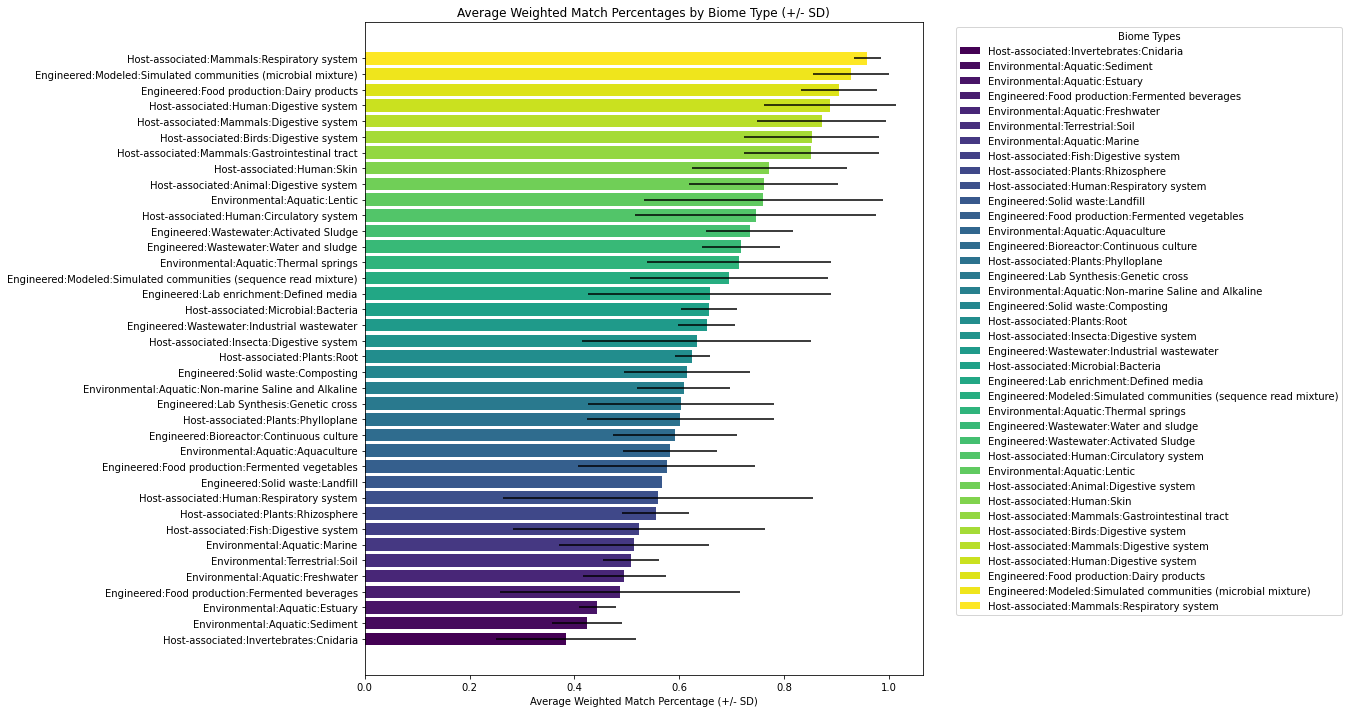

In [48]:
# Group the data by biome type and calculate the average and standard deviation for weighted match percentages
biome_analysis = data.groupby('biome3').agg(
    avg_ref_f_weighted=('ref_f_weighted', 'mean'),
    std_ref_f_weighted=('ref_f_weighted', 'std')
).reset_index()

# Handle missing values for standard deviation
biome_analysis['std_ref_f_weighted'] = biome_analysis['std_ref_f_weighted'].fillna(0)

# Sort the data by average weighted match percentage for visualization
biome_analysis_sorted = biome_analysis.sort_values(by='avg_ref_f_weighted', ascending=True)  # Sorting added here

# Create a color map based on the unique biome types
biome_types = biome_analysis_sorted['biome3'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(biome_types)))
color_map = dict(zip(biome_types, colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 12))

# Plotting with color coding and error bars for standard deviation
biome_legend = {}  # to store legend handles
for biome, color in color_map.items():
    subset = biome_analysis_sorted[biome_analysis_sorted['biome3'] == biome]
    bars = ax.barh(subset['biome3'], subset['avg_ref_f_weighted'], xerr=subset['std_ref_f_weighted'], color=color)
    if biome not in biome_legend:  # add to legend only once
        biome_legend[biome] = bars[0]

ax.set_xlabel('Average Weighted Match Percentage (+/- SD)')
ax.set_title('Average Weighted Match Percentages by Biome Type (+/- SD)')
ax.legend(biome_legend.values(), biome_legend.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', title="Biome Types")

plt.show()

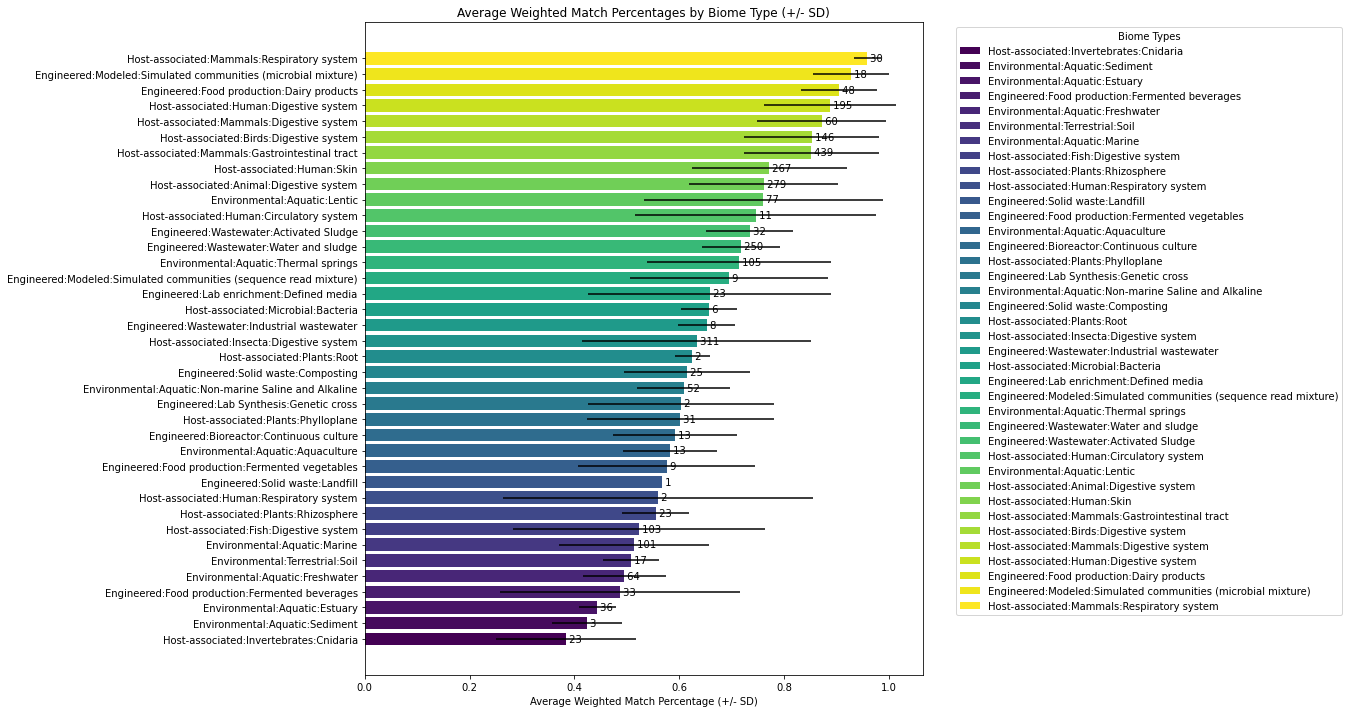

In [50]:
# Group the data by biome type and calculate the average, standard deviation, and count for weighted match percentages
biome_analysis = data.groupby('biome3').agg(
    avg_ref_f_weighted=('ref_f_weighted', 'mean'),
    std_ref_f_weighted=('ref_f_weighted', 'std'),
    count=('biome3', 'size')  # Count the number of entries per biome3
).reset_index()

# Handle missing values for standard deviation
biome_analysis['std_ref_f_weighted'] = biome_analysis['std_ref_f_weighted'].fillna(0)

# Sort the data by average weighted match percentage for visualization
biome_analysis_sorted = biome_analysis.sort_values(by='avg_ref_f_weighted', ascending=True)

# Create a color map based on the unique biome types
biome_types = biome_analysis_sorted['biome3'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(biome_types)))
color_map = dict(zip(biome_types, colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 12))

# Plotting with color coding and error bars for standard deviation
biome_legend = {}  # to store legend handles
for biome, color in color_map.items():
    subset = biome_analysis_sorted[biome_analysis_sorted['biome3'] == biome]
    bars = ax.barh(subset['biome3'], subset['avg_ref_f_weighted'], xerr=subset['std_ref_f_weighted'], color=color)
    # Annotate each bar with the number of metagenomes in the category
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(subset["count"])}', va='center')
    if biome not in biome_legend:  # add to legend only once
        biome_legend[biome] = bars[0]

ax.set_xlabel('Average Weighted Match Percentage (+/- SD)')
ax.set_title('Average Weighted Match Percentages by Biome Type (+/- SD)')
ax.legend(biome_legend.values(), biome_legend.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', title="Biome Types")

plt.show()

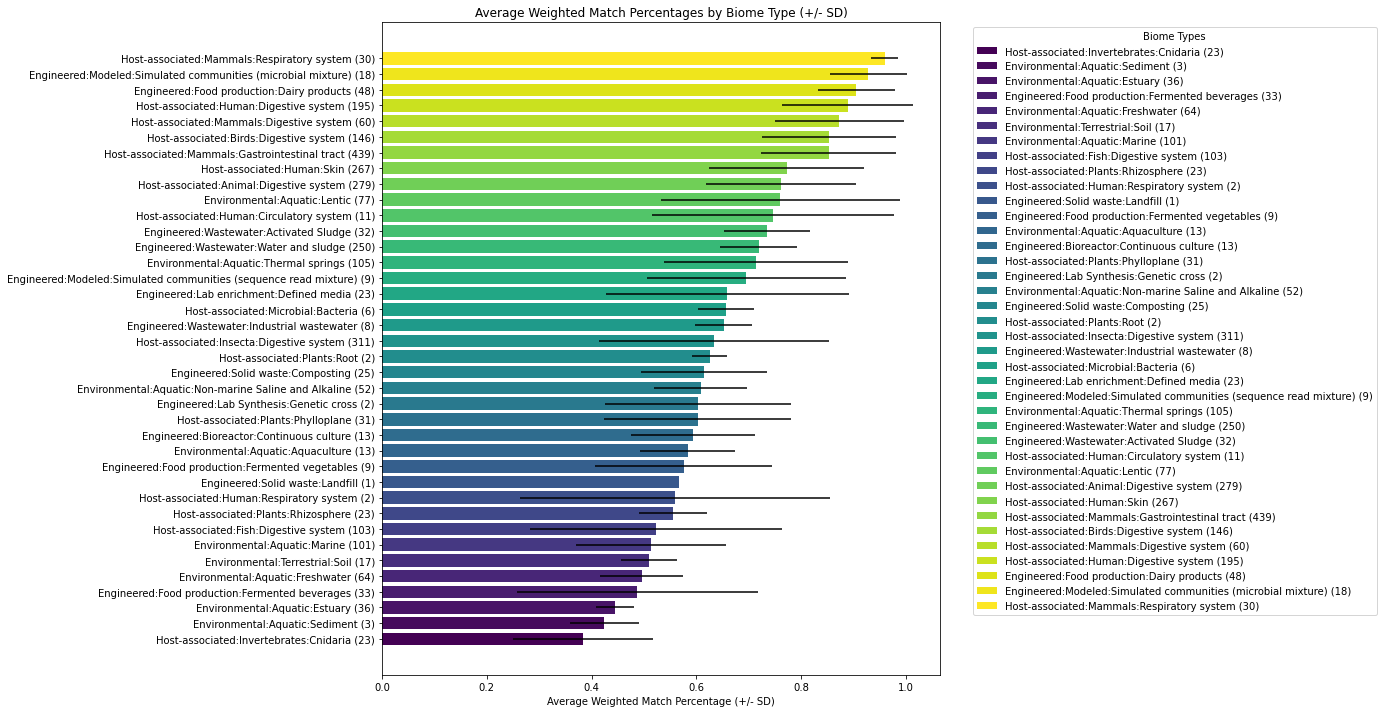

In [51]:
# Group the data by biome type and calculate the average, standard deviation, and count for weighted match percentages
biome_analysis = data.groupby('biome3').agg(
    avg_ref_f_weighted=('ref_f_weighted', 'mean'),
    std_ref_f_weighted=('ref_f_weighted', 'std'),
    count=('biome3', 'size')  # Count the number of entries per biome3
).reset_index()

# Handle missing values for standard deviation
biome_analysis['std_ref_f_weighted'] = biome_analysis['std_ref_f_weighted'].fillna(0)

# Sort the data by average weighted match percentage for visualization
biome_analysis_sorted = biome_analysis.sort_values(by='avg_ref_f_weighted', ascending=True)

# Update biome labels to include counts
biome_analysis_sorted['label'] = biome_analysis_sorted.apply(lambda x: f"{x['biome3']} ({x['count']})", axis=1)

# Create a color map based on the unique biome types
biome_types = biome_analysis_sorted['label'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(biome_types)))
color_map = dict(zip(biome_types, colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 12))

# Plotting with color coding and error bars for standard deviation
biome_legend = {}  # to store legend handles
for biome, color in color_map.items():
    subset = biome_analysis_sorted[biome_analysis_sorted['label'] == biome]
    bars = ax.barh(subset['label'], subset['avg_ref_f_weighted'], xerr=subset['std_ref_f_weighted'], color=color)
    if biome not in biome_legend:  # add to legend only once
        biome_legend[biome] = bars[0]

ax.set_xlabel('Average Weighted Match Percentage (+/- SD)')
ax.set_title('Average Weighted Match Percentages by Biome Type (+/- SD)')
ax.legend(biome_legend.values(), biome_legend.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', title="Biome Types")

plt.show()

In [55]:
# Calculate the count of metagenomes for each biome3 category
biome3_counts = data.groupby('biome3').size().reset_index(name='Number of Samples')

# Sort the dataframe by 'Number of Samples' in ascending order
biome3_counts_sorted = biome3_counts.sort_values(by='Number of Samples', ascending=True)
biome3_counts_sorted.to_csv('sorted_biome_counts.csv', index=False)

# Print the sorted table
print(biome3_counts_sorted)

                                               biome3  Number of Samples
9                     Engineered:Solid waste:Landfill                  1
37                        Host-associated:Plants:Root                  2
27           Host-associated:Human:Respiratory system                  2
4              Engineered:Lab Synthesis:Genetic cross                  2
19                     Environmental:Aquatic:Sediment                  3
34                 Host-associated:Microbial:Bacteria                  6
11        Engineered:Wastewater:Industrial wastewater                  8
3     Engineered:Food production:Fermented vegetables                  9
7   Engineered:Modeled:Simulated communities (sequ...                  9
25           Host-associated:Human:Circulatory system                 11
13                  Environmental:Aquatic:Aquaculture                 13
0            Engineered:Bioreactor:Continuous culture                 13
21                     Environmental:Terrestrial:So

In [57]:

# Calculate the count of metagenomes for each biome3 category and sort
biome3_counts = data.groupby('biome3').size().reset_index(name='Number of Samples')
biome3_counts_sorted = biome3_counts.sort_values(by='Number of Samples', ascending=True)

# Display the DataFrame without the index
print(biome3_counts_sorted.to_string(index=False))

                                                          biome3  Number of Samples
                                 Engineered:Solid waste:Landfill                  1
                                     Host-associated:Plants:Root                  2
                        Host-associated:Human:Respiratory system                  2
                          Engineered:Lab Synthesis:Genetic cross                  2
                                  Environmental:Aquatic:Sediment                  3
                              Host-associated:Microbial:Bacteria                  6
                     Engineered:Wastewater:Industrial wastewater                  8
                 Engineered:Food production:Fermented vegetables                  9
Engineered:Modeled:Simulated communities (sequence read mixture)                  9
                        Host-associated:Human:Circulatory system                 11
                               Environmental:Aquatic:Aquaculture            

## plot by Level 2 only - total 18

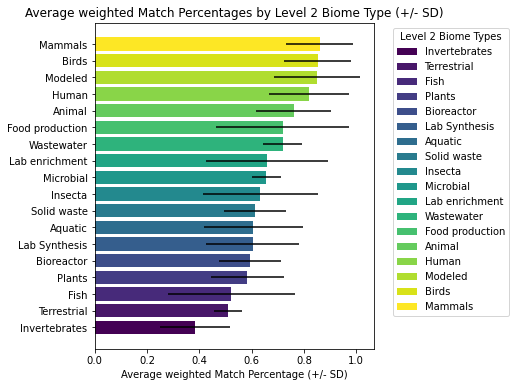

In [31]:
# Extract the level 2 biome from the 'biome3' column
data['level2_biome'] = data['biome3'].apply(lambda x: x.split(':')[1] if len(x.split(':')) > 1 else x)

# Group the data by the new level 2 biome category and calculate the average and standard deviation for weighted match percentages
level2_biome_analysis = data.groupby('level2_biome').agg(
    avg_ref_f_weighted=('ref_f_weighted', 'mean'),
    std_ref_f_weighted=('ref_f_weighted', 'std')
).reset_index()

# Handle missing values for standard deviation
level2_biome_analysis['std_ref_f_weighted'] = level2_biome_analysis['std_ref_f_weighted'].fillna(0)

# Sort the data by average weighted match percentage for visualization
level2_biome_analysis_sorted = level2_biome_analysis.sort_values(by='avg_ref_f_weighted', ascending=True)

# Create a color map based on the unique level 2 biome types
level2_biome_types = level2_biome_analysis_sorted['level2_biome'].unique()
level2_colors = plt.cm.viridis(np.linspace(0, 1, len(level2_biome_types)))
level2_color_map = dict(zip(level2_biome_types, level2_colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(5, 6))

# Plotting with color coding and error bars for standard deviation
for biome, color in level2_color_map.items():
    subset = level2_biome_analysis_sorted[level2_biome_analysis_sorted['level2_biome'] == biome]
    ax.barh(subset['level2_biome'], subset['avg_ref_f_weighted'], xerr=subset['std_ref_f_weighted'], color=color)

ax.set_xlabel('Average weighted Match Percentage (+/- SD)')
ax.set_title('Average weighted Match Percentages by Level 2 Biome Type (+/- SD)')
ax.legend(level2_color_map.keys(), title="Level 2 Biome Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [42]:
total_level2_biome_categories = data['level2_biome'].nunique()
print(total_level2_biome_categories)

18


## plot by Level 1 - total 3

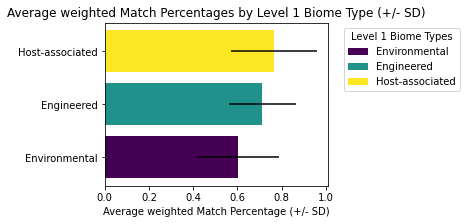

In [33]:
# Extract the level 1 biome from the 'biome3' column
data['level1_biome'] = data['biome3'].apply(lambda x: x.split(':')[0])

# Group the data by the new level 1 biome category and calculate the average and standard deviation for weighted match percentages
level1_biome_analysis = data.groupby('level1_biome').agg(
    avg_ref_f_weighted=('ref_f_weighted', 'mean'),
    std_ref_f_weighted=('ref_f_weighted', 'std')
).reset_index()

# Handle missing values for standard deviation
level1_biome_analysis['std_ref_f_weighted'] = level1_biome_analysis['std_ref_f_weighted'].fillna(0)

# Sort the data by average weighted match percentage for visualization
level1_biome_analysis_sorted = level1_biome_analysis.sort_values(by='avg_ref_f_weighted', ascending=True)

# Create a color map based on the unique level 1 biome types
level1_biome_types = level1_biome_analysis_sorted['level1_biome'].unique()
level1_colors = plt.cm.viridis(np.linspace(0, 1, len(level1_biome_types)))
level1_color_map = dict(zip(level1_biome_types, level1_colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(4, 3))

# Plotting with color coding and error bars for standard deviation
for biome, color in level1_color_map.items():
    subset = level1_biome_analysis_sorted[level1_biome_analysis_sorted['level1_biome'] == biome]
    ax.barh(subset['level1_biome'], subset['avg_ref_f_weighted'], xerr=subset['std_ref_f_weighted'], color=color)

ax.set_xlabel('Average weighted Match Percentage (+/- SD)')
ax.set_title('Average weighted Match Percentages by Level 1 Biome Type (+/- SD)')
ax.legend(level1_color_map.keys(), title="Level 1 Biome Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## plot by Level 1 & 2 - total 17

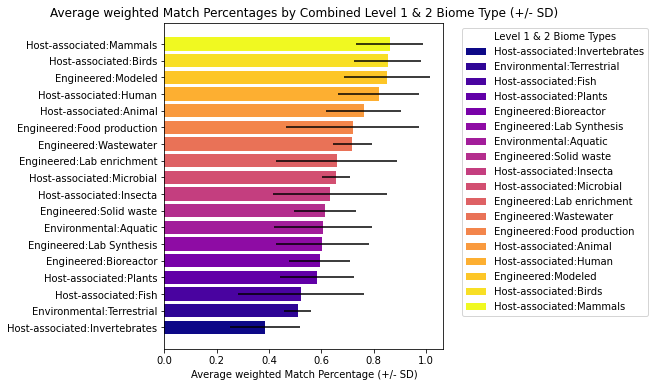

In [34]:
# Combine level 1 and level 2 biome categories into a new column
data['level1_2_biome'] = data['biome3'].apply(lambda x: ':'.join(x.split(':')[:2]))

# Group the data by the combined level 1 and 2 biome category and calculate the average and standard deviation for weighted match percentages
level1_2_biome_analysis = data.groupby('level1_2_biome').agg(
    avg_ref_f_weighted=('ref_f_weighted', 'mean'),
    std_ref_f_weighted=('ref_f_weighted', 'std')
).reset_index()

# Handle missing values for standard deviation
level1_2_biome_analysis['std_ref_f_weighted'] = level1_2_biome_analysis['std_ref_f_weighted'].fillna(0)

# Sort the data by average weighted match percentage for visualization
level1_2_biome_analysis_sorted = level1_2_biome_analysis.sort_values(by='avg_ref_f_weighted', ascending=True)

# Create a color map based on the unique combined level 1 and 2 biome types
level1_2_biome_types = level1_2_biome_analysis_sorted['level1_2_biome'].unique()
level1_2_colors = plt.cm.plasma(np.linspace(0, 1, len(level1_2_biome_types)))
level1_2_color_map = dict(zip(level1_2_biome_types, level1_2_colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(5, 6))

# Plotting with color coding and error bars for standard deviation
for biome, color in level1_2_color_map.items():
    subset = level1_2_biome_analysis_sorted[level1_2_biome_analysis_sorted['level1_2_biome'] == biome]
    ax.barh(subset['level1_2_biome'], subset['avg_ref_f_weighted'], xerr=subset['std_ref_f_weighted'], color=color)

ax.set_xlabel('Average weighted Match Percentage (+/- SD)')
ax.set_title('Average weighted Match Percentages by Combined Level 1 & 2 Biome Type (+/- SD)')
ax.legend(level1_2_color_map.keys(), title="Level 1 & 2 Biome Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [43]:
total_level1_2_biome_categories = data['level1_2_biome'].nunique()
print(total_level1_2_biome_categories)

18
